<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/3.a.%20Convolutional%20Neural%20Network%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
شبکه عصبی کانولوشن (Convolutional Neural Network یا CNN)

🔹 تصور کن یک شبکه عصبی کانولوشنی (CNN) مثل یک ذره‌بین هوشمند است.

تصویر مثل یک نقاشی پیکسلی است
هر عکس از خانه‌های کوچولو (پیکسل) ساخته شده؛ مثل جدول شطرنج، فقط به جای سیاه و سفید، هر خانه روشن‌تر یا تاریک‌تر است.

ذره‌بین (فیلتر) روی تصویر حرکت می‌کند
CNN یک ذره‌بین کوچک دارد (مثلاً ۳x۳ خانه). این ذره‌بین را روی قسمت‌های مختلف تصویر می‌کشد و سعی می‌کند الگوهای مهم مثل خط صاف، گوشه، منحنی را پیدا کند.
(مثل وقتی که تو با چشم دنبال گوشه‌های یک شکل یا خط‌های یک نقاشی می‌گردی).

یاد می‌گیرد چه چیزی مهم است
وقتی این ذره‌بین بارها روی تصاویر تمرین کند، می‌فهمد که چه چیزی نشانه‌ی "چشم" است، چه چیزی نشانه‌ی "گوشه‌ی بینی" یا مثلاً "خط عمودی".

چند ذره‌بین کنار هم
CNN فقط یک ذره‌بین ندارد، بلکه خیلی ذره‌بین با اندازه‌های مختلف دارد تا همزمان بتواند شکل‌های گوناگون را ببیند.

در آخر می‌گوید تصویر چیست
بعد از اینکه همه‌ی الگوها را پیدا کرد، شبکه‌ی عصبی می‌تواند بگوید:

"این یک عدد ۵ است"

یا "این یک گربه است"

یا "این یک ماشین است"

✅ مثال خیلی ساده:
فرض کن می‌خواهی یک گربه را از یک سگ تشخیص بدهی.

اول دنبال گوش‌ها و سبیل‌های گربه می‌گردی.

اگر پیدا کردی → احتمال زیاد گربه است.

اگر گوش‌های بلند دیدی → احتمالاً سگ است.

CNN هم دقیقاً همین کار را با تصاویر دیجیتال انجام می‌دهد.



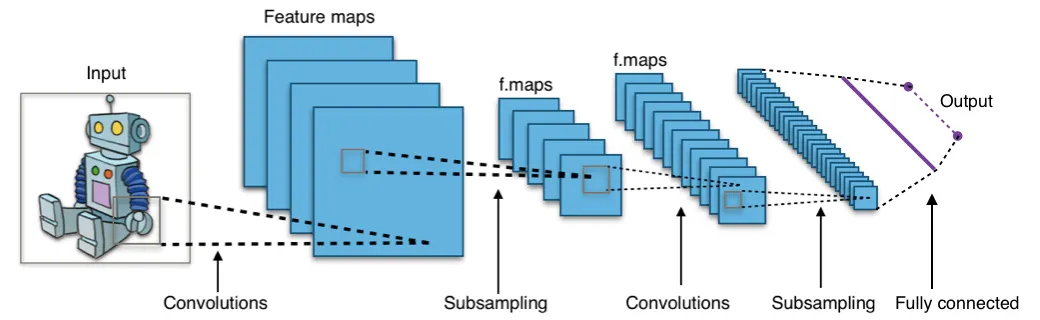

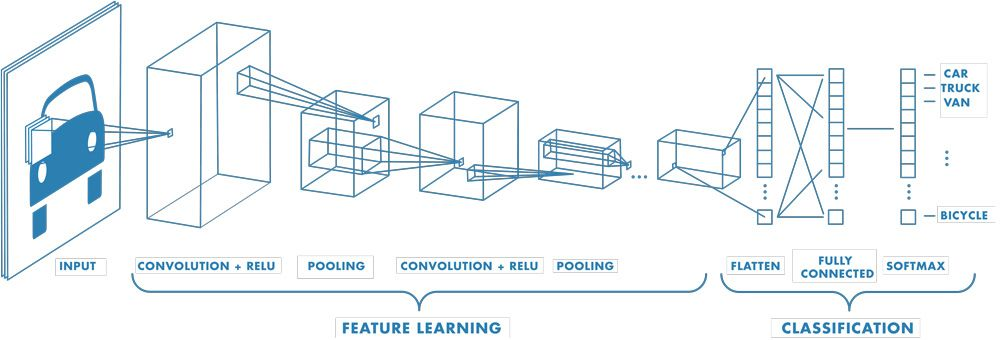


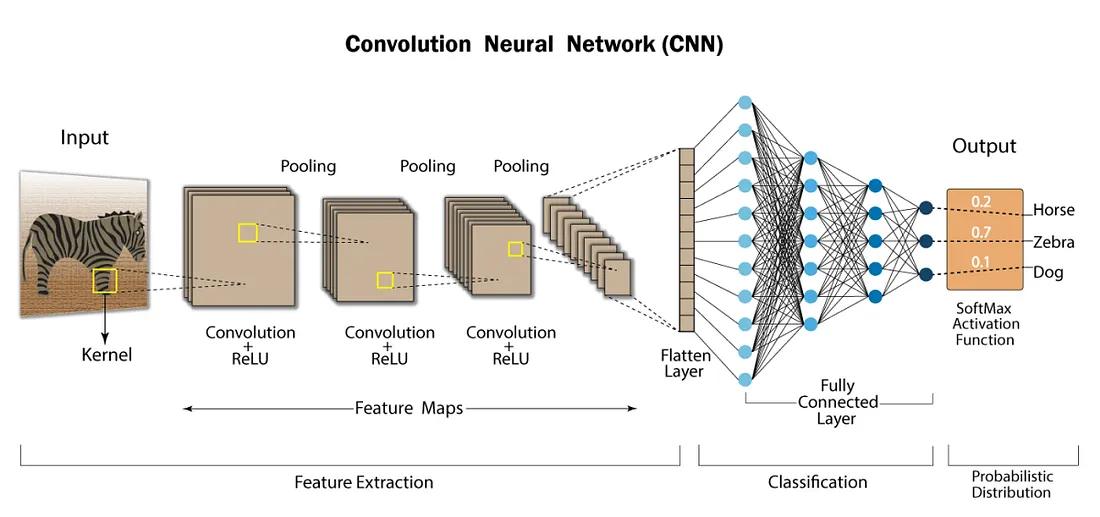

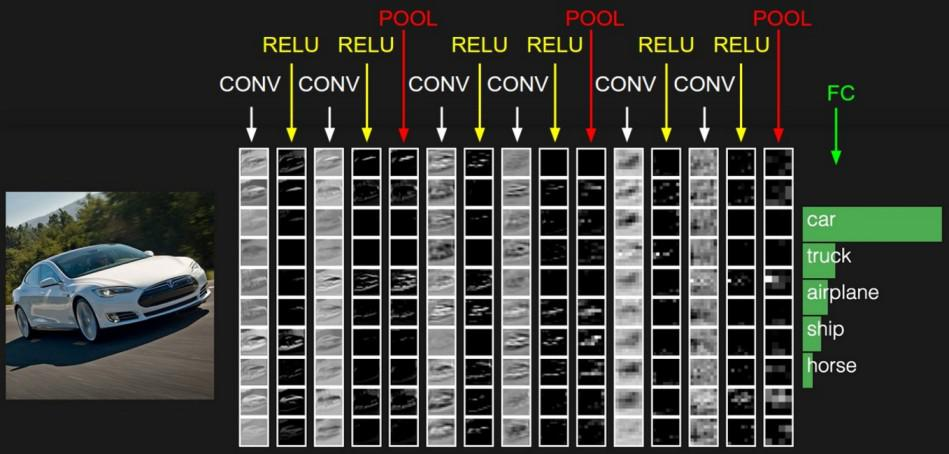

<div dir="rtl" align="right">

یک مثال ساده و کاربردی می‌زنم که ورودی آن تصویر است و با یک شبکه‌ی عصبی
کانولوشنی (CNN) روی دیتاست معروف MNIST (تصاویر دست‌نوشته‌ی اعداد ۰ تا ۹) آموزش می‌دهیم.

🔹 هدف: شبکه یاد بگیرد عدد نوشته شده در تصویر را تشخیص دهد.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.9057 - loss: 0.3114 - val_accuracy: 0.9842 - val_loss: 0.0484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9850 - loss: 0.0484 - val_accuracy: 0.9874 - val_loss: 0.0383
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9926 - loss: 0.0222 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9908 - val_loss: 0.0292
313/313 - 3s - 10ms/step - accuracy: 0.9908 - loss: 0.0292
Model accuracy on test data: 0.9908000230789185


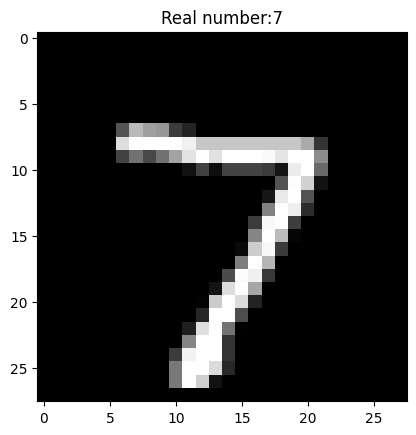

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Model predict: 7


In [2]:
# کتابخانه‌های لازم
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. بارگذاری دیتاست (تصاویر دست‌نوشته اعداد 0 تا 9)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. تغییر شکل تصاویر به (28,28,1) چون تصاویر سیاه‌وسفید هستند
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 3. ساخت مدل CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # فیلترهای کانولوشن
    layers.MaxPooling2D((2, 2)),  # کاهش ابعاد
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # تخت کردن خروجی
    layers.Dense(64, activation='relu'),  # لایه تمام‌متصل
    layers.Dense(10, activation='softmax')  # خروجی 10 کلاس (عدد 0 تا 9)
])

# 4. کامپایل مدل
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. آموزش مدل
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# 6. ارزیابی مدل
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Model accuracy on test data:", test_acc)

# 7. تست روی یک تصویر
plt.imshow(test_images[0].reshape(28,28), cmap="gray")
plt.title("Real number:" + str(test_labels[0]))
plt.show()

prediction = model.predict(test_images[0].reshape(1,28,28,1))
print("Model predict:", prediction.argmax())
